In [157]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [158]:
og_df = pd.read_csv('filt_co2data.csv')
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,country,year,co2
0,Afghanistan,1949,0.015
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.106
5,Afghanistan,1954,0.106
6,Afghanistan,1955,0.154
7,Afghanistan,1956,0.183
8,Afghanistan,1957,0.293
9,Afghanistan,1958,0.330


In [159]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 2) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 2] = np.nan
df

,country,year,co2
0,Afghanistan,1949,NaN
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,NaN
5,Afghanistan,1954,NaN
6,Afghanistan,1955,NaN
7,Afghanistan,1956,0.183
8,Afghanistan,1957,NaN
9,Afghanistan,1958,0.330


In [160]:
# Filling method
newdf = df.interpolate()
if newdf["co2"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,country,year,co2
0,Afghanistan,1949,0.08400
1,Afghanistan,1950,0.08400
2,Afghanistan,1951,0.09200
3,Afghanistan,1952,0.09200
4,Afghanistan,1953,0.11475
5,Afghanistan,1954,0.13750
6,Afghanistan,1955,0.16025
7,Afghanistan,1956,0.18300
8,Afghanistan,1957,0.25650
9,Afghanistan,1958,0.33000


In [161]:
newset2 = df.fillna(method='ffill')
if newset2["co2"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,country,year,co2
0,Afghanistan,1949,0.084
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.092
5,Afghanistan,1954,0.092
6,Afghanistan,1955,0.092
7,Afghanistan,1956,0.183
8,Afghanistan,1957,0.183
9,Afghanistan,1958,0.330


In [162]:
newset3 = df.fillna(method='bfill')
if newset3["co2"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,country,year,co2
0,Afghanistan,1949,0.084
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.183
5,Afghanistan,1954,0.183
6,Afghanistan,1955,0.183
7,Afghanistan,1956,0.183
8,Afghanistan,1957,0.330
9,Afghanistan,1958,0.330


In [163]:
# Mean
meanFill = df.fillna(value=df["co2"].mean())
meanFill

,country,year,co2
0,Afghanistan,1949,0.1562
1,Afghanistan,1950,0.0840
2,Afghanistan,1951,0.0920
3,Afghanistan,1952,0.0920
4,Afghanistan,1953,0.1562
5,Afghanistan,1954,0.1562
6,Afghanistan,1955,0.1562
7,Afghanistan,1956,0.1830
8,Afghanistan,1957,0.1562
9,Afghanistan,1958,0.3300


In [164]:
# Median
medianFill = df.fillna(value=df["co2"].median())
medianFill

,country,year,co2
0,Afghanistan,1949,0.092
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.092
5,Afghanistan,1954,0.092
6,Afghanistan,1955,0.092
7,Afghanistan,1956,0.183
8,Afghanistan,1957,0.092
9,Afghanistan,1958,0.330


In [165]:
# Mode
modeFill = df.fillna(value=df["co2"].mode()[0])
modeFill

,country,year,co2
0,Afghanistan,1949,0.092
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.092
5,Afghanistan,1954,0.092
6,Afghanistan,1955,0.092
7,Afghanistan,1956,0.183
8,Afghanistan,1957,0.092
9,Afghanistan,1958,0.330


In [166]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="co2"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

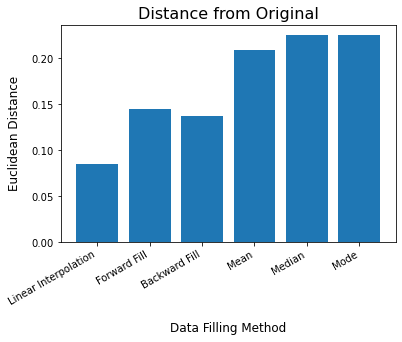

In [167]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [169]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["co2"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf.to_csv('co2data_interpolate.csv', sep=',', index=False)
fullDf

,country,year,co2
0,Afghanistan,1949,0.015
1,Afghanistan,1950,0.084
2,Afghanistan,1951,0.092
3,Afghanistan,1952,0.092
4,Afghanistan,1953,0.106
...,...,...,...
25199,Zimbabwe,2016,10.738
25200,Zimbabwe,2017,9.582
25201,Zimbabwe,2018,11.854
25202,Zimbabwe,2019,10.949
